# Data Storytelling


In [3]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

absences = pd.read_csv('./Absenteeism_at_work.csv', sep= ';')

## What about the popularity of the reasons for absences?


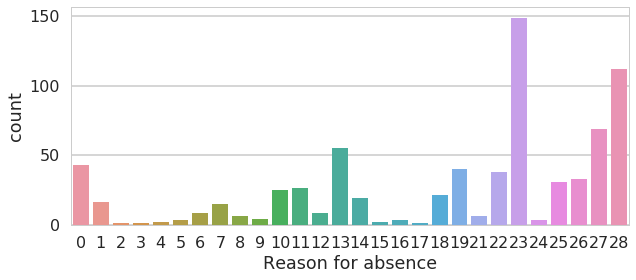

In [4]:
plt.figure(figsize=(10,4)) 
ax1 = sns.countplot(absences['Reason for absence'])
ax1.set_xticklabels(ax1.get_xticklabels(), ha="center")
plt.show()

We see that medical consultation(23) and dental consultation(28) are by far the most popular reasons given, followed by physiotherapy(27), diseases of the musculoskeletal system and connective tissue (13), laboratory examinations (24) and unjustied absence(25). Now let's take a look at how long the absences were for each of these illnesses:

## What kind of absences were the longest?

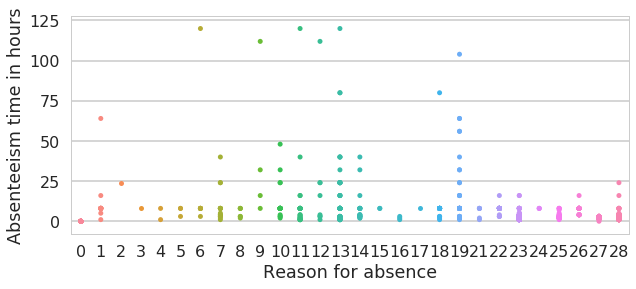

In [5]:
plt.figure(figsize=(10,4)) 
ax2 = sns.stripplot(x="Reason for absence", y="Absenteeism time in hours", data=absences)
plt.show()

Refering back to the data info in the repo: the last seven reasons for absence (22 through 28) were not attested by the International Code of Diseases (ICD), while reasons 1 through 21 were. Note these last seven reasons had all absences take less than 24 hours, while the first 21 types of absences have lengthier occurences.


## Is there pattern of absences based on month?

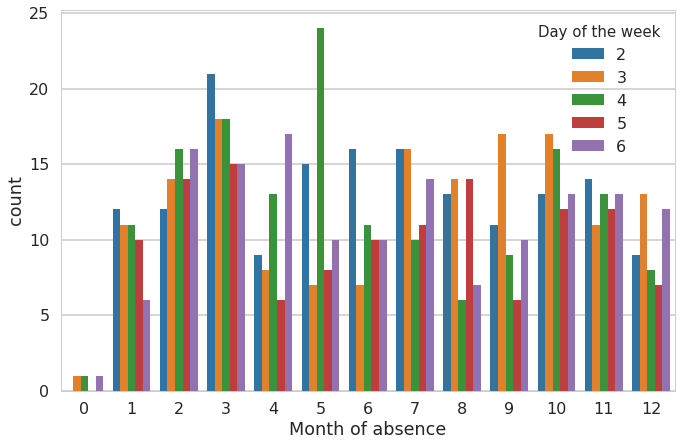

In [6]:
plt.figure(figsize=(11,7)) 
sns.countplot(x='Month of absence', hue='Day of the week', data=absences)
plt.show()


Immediately, we see that for the first 8 months of the year, the most common days of absence were typically Monday (day 2) or Friday (day 6). The last four months of the year features Tuesday (day 3) as a common day of absence, although Monday/Friday absences are still pretty frequent. The month of May features Wednesday as an extremely popular day of absence. 

## Is there any relationship between Education level and length of absence?

First we investivate a stripplot based on the education level:

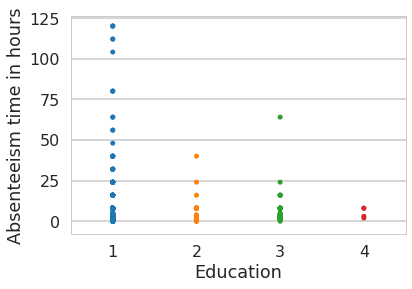

In [7]:
sns.stripplot(absences['Education'],absences['Absenteeism time in hours'])
plt.show()

It appears that as the level of education gets higher, the length of the absence tends to go down. However, we note that this also might be due to there simply being more instances of education level 1 than 2, 2 than 3, and so on.

# Individuals

We see that the ID feature in the dataframe consists of values from 1 to 36, with each different id value denoting a different person. Let's take a closer look at each individual person by trying to create a 'summary' person that has the "typical" characteristics of all the features recorded. In other words, we're going to take the mode of all the categorical features, and mean of the numerical features to generate a "model person" for each of our IDs.

In [8]:
#storytell individuals
categoricals = ['ID', 
                'Reason for absence',
                'Month of absence',
                'Day of the week',
                'Seasons',
                'Disciplinary failure',
                'Education',
                'Social drinker',
                'Social smoker'
                
               ]

df_personal = pd.DataFrame(columns = absences.columns)

summarized_list = []

#try seeing if there's a pattern for people who are sick a lot and people who aren't sick alot
IDlist = range(1,37)

from scipy import stats

for entry in IDlist:
    entry_data = []
    df_personalRecord = absences[absences.ID==entry]
    for column_name in df_personal.columns:
        if column_name in categoricals:
            entry_data.append(stats.mode(df_personalRecord[column_name])[0][0])
        else:
            entry_data.append(df_personalRecord[column_name].mean())
    summarized_list.append(entry_data)

        
df_personal = pd.DataFrame(summarized_list,columns = absences.columns)

In [9]:
df_personal

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,22,8,2,1,235.0,11.0,14.0,37.0,262.894478,...,0,3,1.0,0,0,1.0,88.0,172.0,29.0,5.260870
1,2,0,8,2,1,235.0,29.0,12.0,48.0,241.597000,...,0,1,1.0,0,1,5.0,88.0,163.0,33.0,4.166667
2,3,27,2,4,2,179.0,51.0,18.0,38.0,262.175062,...,0,1,0.0,1,0,0.0,89.0,170.0,31.0,4.265487
3,4,0,0,3,1,118.0,14.0,13.0,40.0,271.219000,...,0,1,1.0,1,0,8.0,98.0,170.0,34.0,0.000000
4,5,26,9,2,4,235.0,20.0,13.0,43.0,266.650632,...,0,1,1.0,1,0,0.0,106.0,167.0,38.0,5.473684
5,6,22,2,5,2,189.0,29.0,13.0,33.0,274.829000,...,0,1,2.0,0,0,2.0,69.0,167.0,25.0,9.000000
6,7,0,3,5,1,279.0,5.0,14.0,39.0,303.210833,...,0,1,2.0,1,1,0.0,68.0,168.0,24.0,5.000000
7,8,0,0,3,1,231.0,35.0,14.0,39.0,282.718000,...,0,1,2.0,1,0,2.0,100.0,170.0,35.0,0.000000
8,9,6,3,3,1,228.0,14.0,16.0,58.0,249.042250,...,0,1,2.0,0,0,1.0,65.0,172.0,22.0,32.750000
9,10,22,7,2,1,361.0,52.0,3.0,28.0,258.870250,...,0,1,1.0,1,0,4.0,80.0,172.0,27.0,7.750000


Above is a dataframe showing the records of people we've attempted to "summarize" using all of their recorded absences. 

### Disciplinary failures

We see that every worker has a mode of 0 for disciplinary failures, so we conclude that even if a few failures were administered, they are very few, and do not occur consistently.

   ### Reason for absences

We see that quite a few people have the reason 0 as their most common reason for absence. While no code was given to the entry 0, it's probably best to assume in this case that no reason was supplied, or the main 28 reasons did not include the given reason. Furthermore, we note that of the people who had 0s as their most common absence reason were either in their early 30s or early 50s:


In [10]:
zero_abs = df_personal['Reason for absence'] == 0
df_personal[zero_abs]


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,2,0,8,2,1,235.0,29.0,12.0,48.0,241.597000,...,0,1,1.0,0,1,5.0,88.0,163.0,33.0,4.166667
3,4,0,0,3,1,118.0,14.0,13.0,40.0,271.219000,...,0,1,1.0,1,0,8.0,98.0,170.0,34.0,0.000000
6,7,0,3,5,1,279.0,5.0,14.0,39.0,303.210833,...,0,1,2.0,1,1,0.0,68.0,168.0,24.0,5.000000
7,8,0,0,3,1,231.0,35.0,14.0,39.0,282.718000,...,0,1,2.0,1,0,2.0,100.0,170.0,35.0,0.000000
18,19,0,3,3,1,291.0,50.0,12.0,32.0,281.129000,...,0,1,0.0,1,0,0.0,65.0,169.0,23.0,2.000000
20,21,0,6,2,1,268.0,11.0,8.0,33.0,256.998000,...,0,2,0.0,0,0,0.0,79.0,178.0,25.0,5.333333
22,23,0,5,4,3,378.0,49.0,11.0,36.0,301.010000,...,0,1,2.0,0,1,4.0,65.0,174.0,21.0,5.000000
28,29,0,5,6,3,225.0,17.2,13.8,38.4,243.738600,...,0,4,1.8,1,0,2.0,89.0,179.4,27.2,4.200000
30,31,0,2,2,2,388.0,15.0,9.0,50.0,328.018000,...,0,1,0.0,0,0,0.0,76.0,178.0,24.0,5.333333
34,35,0,0,6,3,179.0,45.0,14.0,53.0,271.219000,...,0,1,1.0,0,0,1.0,77.0,175.0,25.0,0.000000


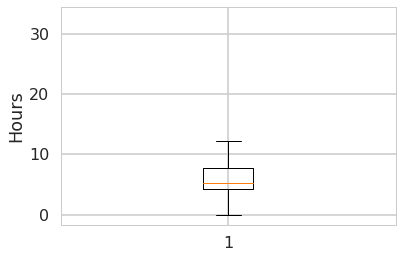

In [35]:
plt.boxplot(df_personal['Absenteeism time in hours'])
plt.ylabel('Hours')
plt.show()

From the above box-and-whiskers plot, we note that the workers whose most common reason for absence was reason 0 had a mean absences (in hours) on the lower side of the workers. 

### Correlation between age and service time

We see that there's a general positive correlation between age and service time: of course, we might expect this to be true, as older workers have a higher chance of being with a company for a longer period of time, while younger ones aren't as likely.



[]

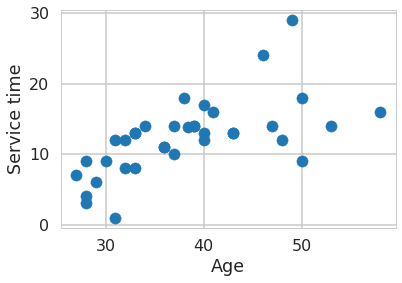

In [31]:
plt.scatter(df_personal['Age'], df_personal['Service time'])
plt.xlabel('Age')
plt.ylabel('Service time')
plt.plot()

### Correlation between Age and weight

We see that there is a pretty positive correlation between weight and age as well: as one increases, the other increases as well.

[]

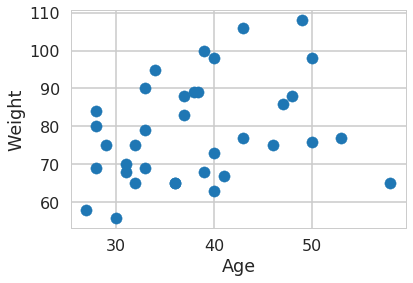

In [37]:
plt.scatter(df_personal['Age'],df_personal['Weight'])
plt.xlabel('Age')
plt.ylabel('Weight')
plt.plot()

### Investigating Absenteeism time

Are there any variables that correlate highly with absenteeism time?

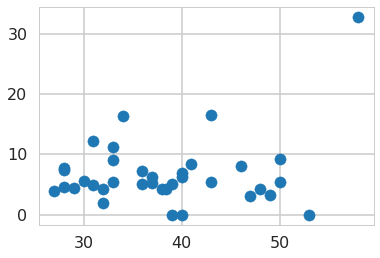

In [29]:
plt.scatter(df_personal['Age'], df_personal['Absenteeism time in hours'])
plt.xlabel('Age')
plt.ylabel('Absenteeism time in hours')
plt.show()

In [1]:
plt.scatter(df_personal['Weight'], df_personal['Absenteeism time in hours'])
plt.xlabel('Weight')
plt.ylabel('Absenteeism time in hours')
plt.show()

NameError: name 'plt' is not defined

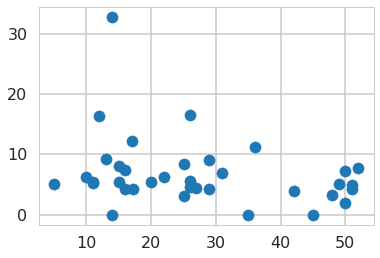

In [44]:
plt.scatter(df_personal['Distance from Residence to Work'], df_personal['Absenteeism time in hours'])
plt.xlabel('Distance from Residence to Work')
plt.ylabel('Hours')
plt.show()

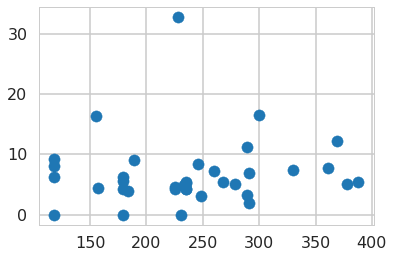

In [45]:
plt.scatter(df_personal['Transportation expense'], df_personal['Absenteeism time in hours'])
plt.xlabel('Transportation expense')
plt.ylabel('Absenteeism time in hours')
plt.show()

In [2]:
plt.scatter(df_personal['Service time'], df_personal['Absenteeism time in hours'])
plt.xlabel('Service time')
plt.ylabel('Absenteeism time in hours')
plt.show()

NameError: name 'plt' is not defined

As shown above, it seems like that when we examine personal averages of absence hours with respect to averages of other variables, we can't find a discernible pattern. Perhaps this is because these hours are aggregated per person and stored as an average.